# Human and nature dynamics (HANDY): Modeling inequality and use of resources in the collapse or sustainability of societies

## Safa Motesharrei$^{ a,⁎}$, Jorge Rivas$^{b}$, Eugenia Kalnay$^{c}$
a School of Public Policy and Department of Mathematics,University of Maryland;and National Socio-Environmental Synthesis Center(SESYNC)

b Department of Political Science,University of Minnesota; and Institute of Global Environment and Society(IGES)

c Department of Atmospheric and Oceanic Science and Institute of Physical Science and Technology, University of Maryland

https://www.sciencedirect.com/science/article/pii/S0921800914000615?via%3Dihub
          

### Highlights
•HANDY is a 4-variable thought-experiment model for interaction of humans and nature.

•The focus is on predicting long-term behavior rather than short-term forecasting.

•Carrying Capacity is developed as a practical measure for forecasting collapses.

•A sustainable steady state is shown to be possible in different types of societies.

•But over-exploitation of either Labor or Nature results in a societal collapse.

## Abstract
There are widespread concerns that current trends in resource-use are unsustainable, but possibilities of overshoot/collapse remain controversial. Collapses have occurred frequently in history, often followed by centuries of economic, intellectual, and population decline. Many different natural and social phenomena have been invoked to explain specific collapses, but a general explanation remains elusive.

In this paper, we build a human population dynamics model by adding accumulated wealth and economic inequality to a predator–prey model of humans and nature. The model structure, and simulated scenarios that offer significant implications, are explained. Four equations describe the evolution of Elites, Commoners, Nature, and Wealth. The model shows Economic Stratification or Ecological Strain can independently lead to collapse, in agreement with the historical record.

The measure “Carrying Capacity” is developed and its estimation is shown to be a practical means for early detection of a collapse. Mechanisms leading to two types of collapses are discussed. The new dynamics of this model can also reproduce the irreversible collapses found in history. Collapse can be avoided, and population can reach a steady state at maximum carrying capacity if the rate of depletion of nature is reduced to a sustainable level and if resources are distributed equitably.

![](HANDY_model.jpg)

In [1]:
# coding: utf-8

# In[3]:

get_ipython().magic('matplotlib inline')
# %load ../newman/euler.py
import numpy as np
import matplotlib.pyplot as plt

## parameters

In [2]:
alph_m = 1.0e-2
alph_max = 7.0e-2
beta_c = 3e-2
beta_e = 3e-2
s = 5.0e-4
rho = 5.0e-3
gam = 1.0e-2
lam = 100
kap = 1 # 1, 10, 100
del_ = 6.67e-6#No typical value

## initial values

In [3]:
chi_cnot = 100
chi_enot = 25 # 0, 1, 25
chi_c = chi_cnot  #I'm not quite sure how to deal with this specific condition
chi_e = chi_enot
w = 0.01          # Initial condition
y = lam           # Initial condition

## HANDY EQs

In [4]:
def xp_c(chi_c):
    return (beta_c - alph_c)*chi_c
def xp_e(chi_e):
    return (beta_e - alph_e)*chi_e
def yp(y,chi_c):
    return (gam*(lam-y)-del_*chi_c)*y
def wp(chi_c):
    return del_*chi_c*y-c_c-c_e  #this function doesn't have the variable "w" in it explicitly: FIX

## Euler Solver

In [5]:
a = 0.0           # Start of the interval
b = 1000.0        # End of the interval
N = 10000.0       # Number of steps
h = (b-a)/N       # Size of a single step

#create the array of time values and (empty) x-values, and loop over 
#all times supplementing x each time
tpoints = np.arange(a,b,h)
chi_cpts = []
chi_epts = []
ypts = []
wpts = []

for t in tpoints:
    chi_cpts.append(chi_c)
    chi_epts.append(chi_e)
    ypts.append(y)
    wpts.append(w)
    
    #variables and equations
    w_th = rho*(chi_c + kap*chi_e)
    omega = w/(w_th)
    c_c = min(1, omega)*s*chi_c  #TO DO: figure out what min() means...
    c_e = min(1, omega)*kap*s*chi_e  #TO DO: ^same
    alph_c = alph_m + max(0, 1-c_c/(s*chi_c))*(alph_max - alph_m)  #TO DO: ^same
    alph_e = alph_m + max(0, 1-c_e/(s*chi_e))*(alph_max - alph_m)  #TO DO: ^same
    eta = (alph_max - beta_c)/(alph_max - alph_m)
    chi = gam/(del_)*(lam-eta*s/del_)
    phi = chi_enot/(chi_cnot)
    psy = chi_e/(chi_c)

    egal_opt = 2*eta*s/(lam)
    equi_opt = 2*eta*s*(1 + phi)/(lam)
    uneq_opt = 2*eta*s*(1 + kap*psy)/(lam)

    chi_m = gam*lam/(2*egal_opt) #or (gam*(lam/2)^2)/(eta*s)


    chi_c += h*xp_c(chi_c)
    chi_e += h*xp_e(chi_e)
    y += h*yp(y,chi_c)
    w += h*wp(chi_c)
    

## Graphing

<Figure size 44064x288 with 0 Axes>

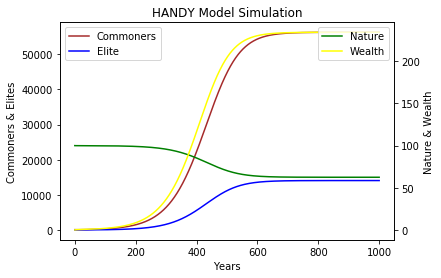

In [7]:
plt.figure(figsize=[612,4])
fig, ax = plt.subplots()
#plt.loglog(tpoints,chi_cpts, color = 'brown' , label='Commoners')
#plt.semilogx(tpoints,chi_cpts, color = 'brown' , label='Commoners')
#plt.semilogy(tpoints,chi_cpts, color = 'brown' , label='Commoners')
plt.plot(tpoints,chi_cpts, color = 'brown' , label='Commoners')
plt.plot(tpoints,chi_epts, color = 'blue' , label='Elite')
plt.title("HANDY Model Simulation")
plt.xlabel("Years")
plt.ylabel("Commoners & Elites")
plt.legend(loc='upper left')
plt.twinx()
#plt.semilogy(tpoints,chi_epts, color = 'blue' , label='Elite')
#plt.plot(tpoints,chi_epts, color = 'blue' , label='Elite')
plt.plot(tpoints,ypts, color = 'green' , label='Nature')
plt.plot(tpoints,wpts, color = 'yellow' , label='Wealth')

plt.legend(loc='upper right')
plt.ylabel("Nature & Wealth")
plt.savefig('Handy model (equitable).png')
plt.show()